In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

from nuplan_extent.planning.training.closed_loop.utils.raster_repainter import repaint_raster
from nuplan_extent.planning.training.closed_loop.utils.torch_util import matrix_from_pose

import pickle
import gzip
import torch
import numpy as np

In [3]:
with gzip.open("/mnt/nas20/nuplan_cached/mini_closed_loop_raster6_no_overlap/2021.05.12.22.00.38_veh-35_01008_01518/high_magnitude_speed/0343df83cc3354af/0_2b8e02246542501e/raster.gz", "rb") as f:
     data = pickle.load(f)['data']     

In [4]:
data = torch.from_numpy(data).permute(2, 0, 1).unsqueeze(0)

In [5]:
data.shape

torch.Size([1, 6, 224, 224])

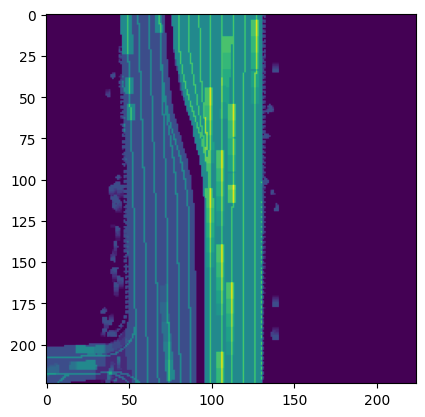

In [11]:
plt.imshow(data[0].mean(dim=0))

In [25]:
pose = torch.tensor([[[10.0, 10.0, np.pi/2]]])

In [26]:
matrix = matrix_from_pose(pose)

In [27]:
output = repaint_raster(data, matrix[:, 0, ...])

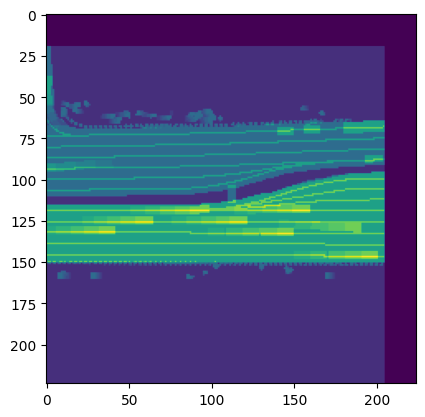

In [28]:
plt.imshow(output[0].numpy().mean(axis=0))

In [10]:
output[0][:, 200, 150]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6316])